In [1]:
# Dependencies
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#path to csv files
sf_2017 = "2017_StopFrisk.csv"

In [3]:
# read csv files 
df_2017 = pd.read_csv(sf_2017)

In [4]:
#show dataframe
df_2017.head()

,STOP_FRISK_ID,STOP_FRISK_DATE,STOP_FRISK_TIME,YEAR2,MONTH2,DAY2,STOP_WAS_INITIATED,SPRINT_NUMBER,RECORD_STATUS_CODE,ISSUING_OFFICER_RANK,...,STOP_LOCATION_SECTOR_CODE,STOP_LOCATION_APARTMENT,STOP_LOCATION_FULL_ADDRESS,STOP_LOCATION_PREMISES_NAME,STOP_LOCATION_STREET_NAME,STOP_LOCATION_X,STOP_LOCATION_Y,STOP_LOCATION_ZIP_CODE,STOP_LOCATION_PATROL_BORO_NAME,STOP_LOCATION_BORO_NAME
0,1,1/16/2017,14:26:00,2017,January,Monday,Based on Self Initiated,11617924,APP,SGT,...,(null),(null),180 GREENWICH STREET,(null),GREENWICH STREET,982381,201750,(null),PBMS,MANHATTAN
1,2,1/16/2017,14:26:00,2017,January,Monday,Based on Self Initiated,11617924,APP,SGT,...,(null),(null),180 GREENWICH STREET,(null),GREENWICH STREET,982381,201750,(null),PBMS,MANHATTAN
2,3,2/8/2017,11:10:00,2017,February,Wednesday,Based on C/W on Scene,17020808555,APP,POM,...,C,(null),WALL STREET && BROADWAY,(null),WALL STREET,981005,197131,(null),PBMS,MANHATTAN
3,4,2/20/2017,11:35:00,2017,February,Monday,Based on Self Initiated,9027,APP,POM,...,H,(null),75 GREENE STREET,(null),GREENE STREET,984031,202796,(null),PBMS,MANHATTAN
4,5,2/21/2017,13:20:00,2017,February,Tuesday,Based on Radio Run,10439,APP,POM,...,H,2,429 WEST BROADWAY,(null),WEST BROADWAY,983894,203523,(null),PBMS,MANHATTAN


In [5]:
# show list of columns to determine which ones we nned and don't need 
df_2017.columns

Index(['STOP_FRISK_ID', 'STOP_FRISK_DATE', 'STOP_FRISK_TIME', 'YEAR2',
       'MONTH2', 'DAY2', 'STOP_WAS_INITIATED', 'SPRINT_NUMBER',
       'RECORD_STATUS_CODE', 'ISSUING_OFFICER_RANK',
       'ISSUING_OFFICER_COMMAND_CODE', 'SUPERVISING_OFFICER_RANK',
       'SUPERVISING_OFFICER_COMMAND_CODE',
       'SUPERVISING_ACTION_CORRESPONDING_ACTIVITY_LOG_ENTRY_REVIEWED',
       'LOCATION_IN_OUT_CODE', 'JURISDICTION_CODE', 'JURISDICTION_DESCRIPTION',
       'OBSERVED_DURATION_MINUTES', 'SUSPECTED_CRIME_DESCRIPTION',
       'STOP_DURATION_MINUTES', 'OFFICER_EXPLAINED_STOP_FLAG',
       'OFFICER_NOT_EXPLAINED_STOP_DESCRIPTION', 'OTHER_PERSON_STOPPED_FLAG',
       'SUSPECT_ARRESTED_FLAG', 'SUSPECT_ARREST_NUMBER',
       'SUSPECT_ARREST_OFFENSE', 'SUMMONS_ISSUED_FLAG', 'SUMMONS_NUMBER',
       'SUMMONS_OFFENSE_DESCRIPTION', 'OFFICER_IN_UNIFORM_FLAG',
       'ID_CARD_IDENTIFIES_OFFICER_FLAG', 'SHIELD_IDENTIFIES_OFFICER_FLAG',
       'VERBAL_IDENTIFIES_OFFICER_FLAG', 'FRISKED_FLAG', 'SEARCHED_FLAG

In [6]:
#create reduced dataframe comprised only of necessary columns 
df_reduced = df_2017[['STOP_FRISK_ID', 'STOP_FRISK_TIME', 'MONTH2', 'DAY2', 'SUSPECTED_CRIME_DESCRIPTION', 'STOP_DURATION_MINUTES', 'SUSPECT_ARRESTED_FLAG', 'FRISKED_FLAG', 'PHYSICAL_FORCE_WEAPON_IMPACT_FLAG', 'SUSPECT_REPORTED_AGE', 'SUSPECT_SEX', 'SUSPECT_RACE_DESCRIPTION', 'STOP_LOCATION_BORO_NAME']]


In [7]:
# visualize changes to confirm 
df_reduced.head()

,STOP_FRISK_ID,STOP_FRISK_TIME,MONTH2,DAY2,SUSPECTED_CRIME_DESCRIPTION,STOP_DURATION_MINUTES,SUSPECT_ARRESTED_FLAG,FRISKED_FLAG,PHYSICAL_FORCE_WEAPON_IMPACT_FLAG,SUSPECT_REPORTED_AGE,SUSPECT_SEX,SUSPECT_RACE_DESCRIPTION,STOP_LOCATION_BORO_NAME
0,1,14:26:00,January,Monday,TERRORISM,90,N,N,(null),39,MALE,(null),MANHATTAN
1,2,14:26:00,January,Monday,TERRORISM,90,N,N,(null),37,MALE,(null),MANHATTAN
2,3,11:10:00,February,Wednesday,OTHER,40,N,N,(null),(null),FEMALE,WHITE,MANHATTAN
3,4,11:35:00,February,Monday,GRAND LARCENY AUTO,40,N,Y,(null),31,MALE,BLACK HISPANIC,MANHATTAN
4,5,13:20:00,February,Tuesday,BURGLARY,60,N,N,(null),(null),FEMALE,BLACK,MANHATTAN


In [8]:
#reset index
df_reduced = df_reduced.set_index("STOP_FRISK_ID")

In [9]:
# want to study trends in each borough. To do so, its necessary to create separate datasets comprised only of data in each borough
# so that we can do that, we need to see what unique borough values we are working with 
df_reduced["STOP_LOCATION_BORO_NAME"].unique()

array(['MANHATTAN', 'PBMS', '210334', '208760', '986759', 'PBMN', 'BRONX',
       '(null)', 'PBBX', '237177', 'BROOKLYN', '155070', 'PBBS', 'QUEENS',
       'PBBN', '190241', '208169', 'STATEN IS', 'PBSI'], dtype=object)

In [10]:
#save reduced dataframe to csv 
df_reduced.to_csv("df_reduced.csv")

In [11]:
# use loc function to create separate datasets for each borough. 

manhattan_df = df_reduced.loc[((df_reduced["STOP_LOCATION_BORO_NAME"] == "MANHATTAN") \
                               | (df_reduced["STOP_LOCATION_BORO_NAME"] == "PBMS") | \
                               (df_reduced["STOP_LOCATION_BORO_NAME"] == "PBMN"))]
brooklyn_df = df_reduced.loc[((df_reduced["STOP_LOCATION_BORO_NAME"] == "BROOKLYN") \
                              | (df_reduced["STOP_LOCATION_BORO_NAME"] == "PBBS") \
                              | (df_reduced["STOP_LOCATION_BORO_NAME"] == "PBBN"))]
bronx_df = df_reduced.loc[((df_reduced["STOP_LOCATION_BORO_NAME"] == "BRONX") \
                           | (df_reduced["STOP_LOCATION_BORO_NAME"] == "PBBX"))]
queens_df = df_reduced.loc[df_reduced["STOP_LOCATION_BORO_NAME"] == "QUEENS"]
staten_df = df_reduced.loc[((df_reduced["STOP_LOCATION_BORO_NAME"] == "STATEN IS") \
                            | (df_reduced["STOP_LOCATION_BORO_NAME"] == "PBSI"))]
unknown_df = df_reduced.loc[((df_reduced["STOP_LOCATION_BORO_NAME"] == "210334") \
                             | (df_reduced["STOP_LOCATION_BORO_NAME"] == "208760") \
                             | (df_reduced["STOP_LOCATION_BORO_NAME"] == "986759") \
                             | (df_reduced["STOP_LOCATION_BORO_NAME"] == "(null)") \
                             | (df_reduced["STOP_LOCATION_BORO_NAME"] == "237177") \
                             | (df_reduced["STOP_LOCATION_BORO_NAME"] == "155070") \
                             | (df_reduced["STOP_LOCATION_BORO_NAME"] == "190241") \
                             | (df_reduced["STOP_LOCATION_BORO_NAME"] == "208169"))]

In [12]:
# Want to determine which borough has the highest raw number of SQF incidents. We can do this by taking the length of each \
# borough's dataset

manhattan_stops = len(manhattan_df)
brooklyn_stops = len(brooklyn_df)
bronx_stops = len(bronx_df)
queens_stops = len(queens_df)
staten_stops = len(staten_df)
unknown_stops = len(unknown_df)
nyc_total_stops = staten_stops + queens_stops + brooklyn_stops + manhattan_stops + bronx_stops + unknown_stops

#make a dataframe of stops in each borough 

stops_df = pd.DataFrame({
    "Geographic_Area": ["Manhattan", "Brooklyn", "Bronx", "Queens", "Staten Island", "Unknown", "New York City"],
    "SQF_Stops": [manhattan_stops, brooklyn_stops, bronx_stops, queens_stops, staten_stops, unknown_stops, nyc_total_stops]})
print(stops_df)

  Geographic_Area  SQF_Stops
0       Manhattan       2775
1        Brooklyn       3332
2           Bronx       2478
3          Queens       2079
4   Staten Island        547
5         Unknown        418
6   New York City      11629


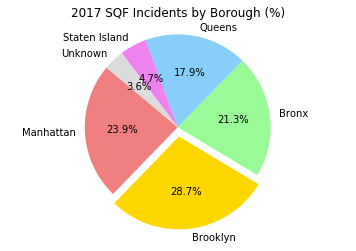

In [27]:
# Make Pie 

borough_pie = ["Manhattan", "Brooklyn", "Bronx", "Queens", "Staten Island", "Unknown"]
boro_sqf_values = [manhattan_stops, brooklyn_stops, bronx_stops, queens_stops, staten_stops, unknown_stops]
boro_pie_colors = ["lightcoral", "gold", "palegreen", "lightskyblue", "violet", "gainsboro"]
explode = [0, 0.1, 0, 0, 0, 0]

plt.pie(boro_sqf_values, labels=borough_pie, colors=boro_pie_colors, autopct="%1.1f%%", startangle=140, explode=explode)

# Create equal axes for nice circle
plt.axis("equal")

# title and save 
plt.title("2017 SQF Incidents by Borough (%)")
plt.savefig("StopsbyBor_Rachael.png", bbox_inches="tight", dpi=600)

In [14]:
# read in csv file 
Population_2017 = "borough_population.csv"
df_pop = pd.read_csv(Population_2017)
print(df_pop)

  Geographic_Area  Population
0           Bronx     1471160
1        Brooklyn     2648771
2       Manhattan     1664727
3          Queens     2358582
4   Staten Island      479458
5   New York City     8622698


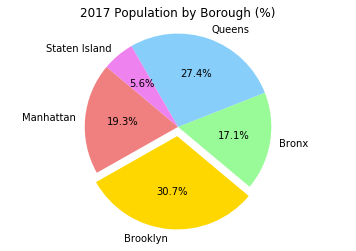

In [28]:
# Want to illustrate how total NYC population is distributed across boroughs.
# Percentage of SQF in each borough should be roughly equal to the boroughs share of overall population 
pop_pie = ["Manhattan", "Brooklyn", "Bronx", "Queens", "Staten Island"]
pop_values = [1664727, 2648771, 1471160, 2358582, 479458]
boro_pie_colors = ["lightcoral", "gold", "palegreen", "lightskyblue", "violet"]
explode_pop = [0, 0.1, 0, 0, 0]
plt.pie(pop_values, labels=pop_pie, colors=boro_pie_colors, autopct="%1.1f%%", startangle=140, explode=explode_pop)
# Create equal axes for nice circle
plt.axis("equal")
plt.title("2017 Population by Borough (%)")
plt.savefig("PopbyBor_Rachael.png", bbox_inches="tight", dpi=600)

In [16]:
# express sqf incidents as percentage of borough pop
# merge population and sqf stops dataframes
combined_df = pd.merge(df_pop, stops_df, how="outer", on="Geographic_Area")
combined_df

,Geographic_Area,Population,SQF_Stops
0,Bronx,1471160.0,2478
1,Brooklyn,2648771.0,3332
2,Manhattan,1664727.0,2775
3,Queens,2358582.0,2079
4,Staten Island,479458.0,547
5,New York City,8622698.0,11629
6,Unknown,NaN,418


In [17]:
# fill in values of column 
for index, row in combined_df.iterrows():
    combined_df.loc[index, "Stops_by_Population (%)"] = (combined_df.loc[index, "SQF_Stops"]/\
                                                         combined_df.loc[index, "Population"])*100
#reset index
combined_df = combined_df.set_index("Geographic_Area")
#print 
combined_df

,Population,SQF_Stops,Stops_by_Population (%)
Geographic_Area,,,
Bronx,1471160.0,2478,0.168439
Brooklyn,2648771.0,3332,0.125794
Manhattan,1664727.0,2775,0.166694
Queens,2358582.0,2079,0.088146
Staten Island,479458.0,547,0.114087
New York City,8622698.0,11629,0.134865
Unknown,NaN,418,NaN


In [18]:
#drop unknown and NYC total 
combined_df = combined_df.drop(["Unknown", "New York City"])

#visualize 
combined_df

,Population,SQF_Stops,Stops_by_Population (%)
Geographic_Area,,,
Bronx,1471160.0,2478,0.168439
Brooklyn,2648771.0,3332,0.125794
Manhattan,1664727.0,2775,0.166694
Queens,2358582.0,2079,0.088146
Staten Island,479458.0,547,0.114087


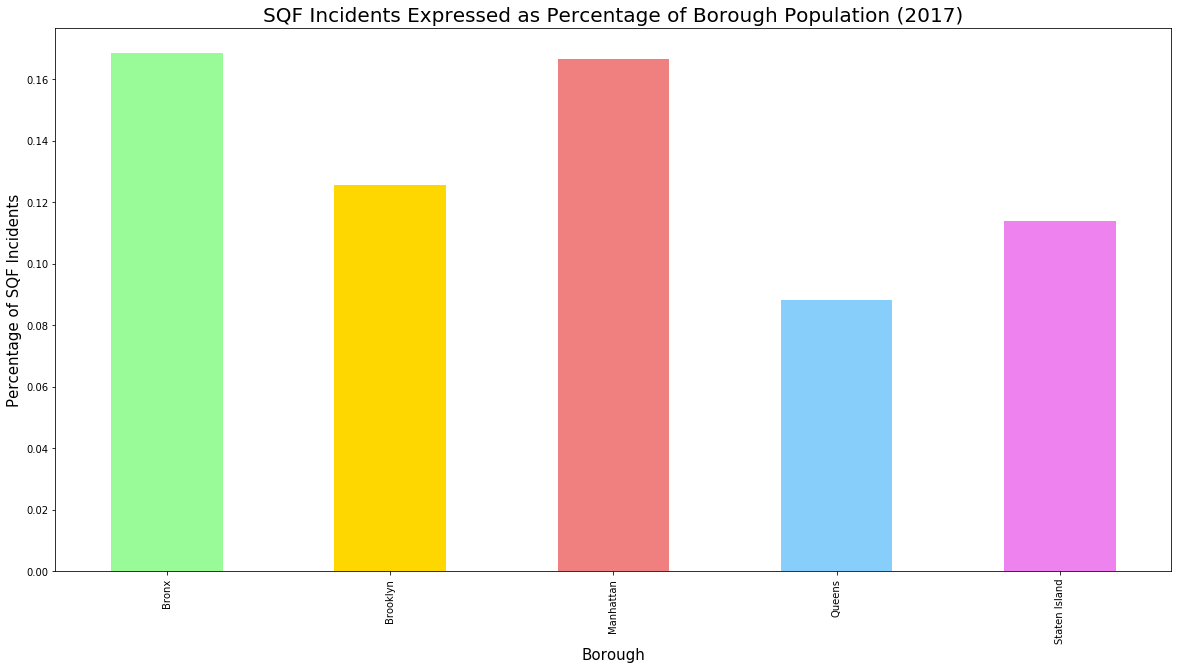

In [29]:
sqf_by_pop = combined_df["Stops_by_Population (%)"].plot(kind="bar", colors=["palegreen", "gold", "lightcoral", "lightskyblue", "violet"], figsize=(20,10))

#labels
plt.title("SQF Incidents Expressed as Percentage of Borough Population (2017)", fontsize=20)
plt.xlabel("Borough", fontsize=15)
plt.ylabel("Percentage of SQF Incidents", fontsize=15)


#save image
plt.savefig("SQFbyBoroPop_Rachael.png", bbox_inches="tight", dpi=600)

In [30]:
#find day counts throughout all nyc using value_counts and create a dataframe
total_days_df = pd.DataFrame(df_reduced["DAY2"].value_counts())
#rename column
total_days_df.columns = ["Number_of_Stops"]
total_days_df

,Number_of_Stops
Thursday,1801
Wednesday,1799
Saturday,1797
Tuesday,1721
Friday,1704
Sunday,1490
Monday,1317


In [31]:
# find Monday-Friday counts by each borough and create a data frame for each. \
# Each borough's "Number of Stops" column is named the same thing to make it easy to concat later 
manhattan_days = pd.DataFrame(manhattan_df["DAY2"].value_counts())
manhattan_days.columns = ["Number_of_Stops"]

brooklyn_days = pd.DataFrame(brooklyn_df["DAY2"].value_counts())
brooklyn_days.columns = ["Number_of_Stops"]

bronx_days = pd.DataFrame(bronx_df["DAY2"].value_counts())
bronx_days.columns = ["Number_of_Stops"]

queens_days = pd.DataFrame(queens_df["DAY2"].value_counts())
queens_days.columns = ["Number_of_Stops"]

staten_days = pd.DataFrame(staten_df["DAY2"].value_counts())
staten_days.columns = ["Number_of_Stops"]

unknown_days = pd.DataFrame(unknown_df["DAY2"].value_counts())
unknown_days.columns = ["Number_of_Stops"]

In [32]:
# concat the above 
day_df = pd.concat([manhattan_days, brooklyn_days, bronx_days, \
                    queens_days, staten_days, unknown_days], axis=1)
#rename columns for clarity
day_df.columns = ["Manhattan_Stops", "Brooklyn_Stops", "Bronx_Stops", \
                  "Queens_Stops", "Staten_Island_Stops", "Unknown_Borough_Stops"]

C:\Users\Rachael C. Amick\anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


In [33]:
# visualize to make sure it worked
day_df

,Manhattan_Stops,Brooklyn_Stops,Bronx_Stops,Queens_Stops,Staten_Island_Stops,Unknown_Borough_Stops
Friday,432,496,311,310,99,56
Monday,319,381,254,241,68,54
Saturday,374,533,427,320,79,64
Sunday,379,426,314,249,59,63
Thursday,412,498,398,343,87,63
Tuesday,416,494,390,289,70,62
Wednesday,443,504,384,327,85,56


In [34]:
# reset the index so that the chart flows from Monday - Sunday and not in order from
new_index= ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
day_df = day_df.reindex(new_index)

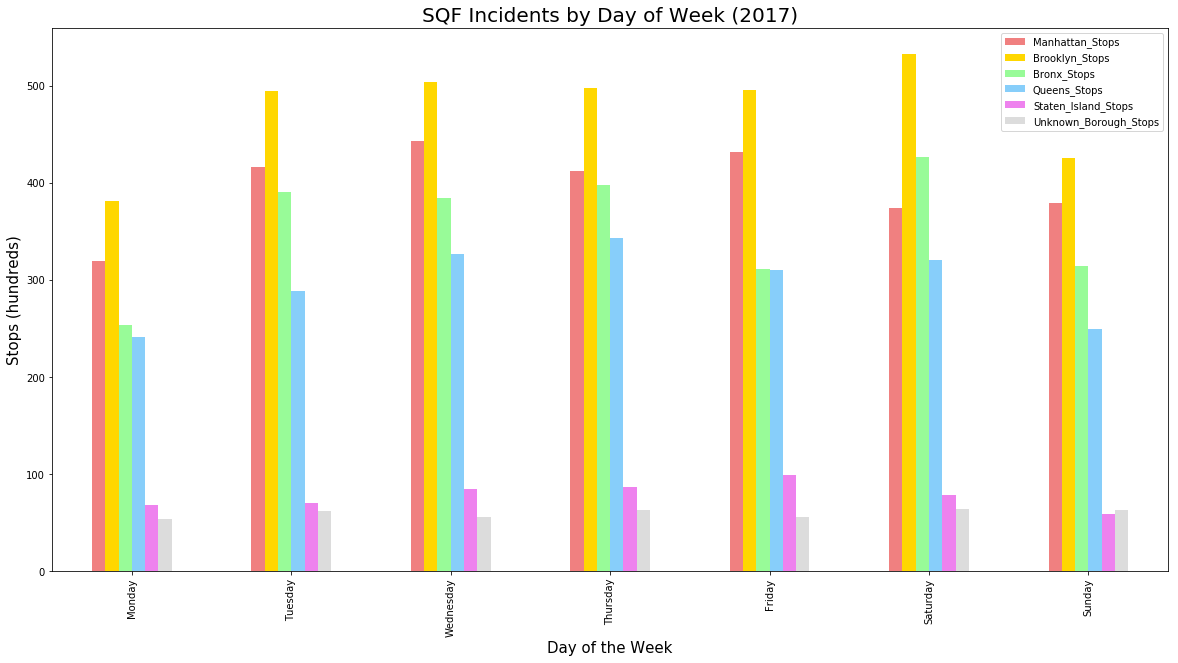

In [35]:
# plot
multi_plot = day_df.plot(kind="bar", colors=["lightcoral", "gold", "palegreen", "lightskyblue", \
                                             "violet", "gainsboro"], figsize=(20,10))

#labels and legend 
plt.title("SQF Incidents by Day of Week (2017)", fontsize=20)
plt.xlabel("Day of the Week", fontsize=15)
plt.ylabel("Stops (hundreds)", fontsize=15)
plt.legend(loc="best")

#save image
plt.savefig("StopsbyDay_Rachael.png", bbox_inches="tight", dpi=600)